In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

import warnings as w
w.filterwarnings('ignore')

In [2]:
ABSOLUTE_PATH = "C:\\Users\\rudnf\\vscode\\Graduation\\final\\data\\"
SEASONS = ["spring", "summer", "fall", "winter"]
MONTHS = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "11", "12"]
KS = [25, 50, 75, 100]

In [ ]:
def season_match(season):
    months = []
    if season == "spring":
        months = ["03", "04", "05"]
    if season == "summer":
        months = ["06", "07", "08"]
    if season == "fall":
        months = ["09", "10", "11"]
    if season == "winter":
        months = ["12", "01", "02"]
    return months

In [3]:
df = pd.read_csv(ABSOLUTE_PATH + f"stay_point\\stay_point_01.csv")
df    

,longitude,latitude
0,126.479111,33.498001
1,126.479671,33.498486
2,126.523943,33.513059
3,126.545535,33.474375
4,126.515921,33.500070
...,...,...
46273,126.267239,33.414463
46274,126.376403,33.483019
46275,126.418843,33.456212
46276,126.345439,33.396640


In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=50, init='k-means++', random_state=0).fit(df[['longitude','latitude']])
# y_kmeans = kmeans.fit_predict(x)
kmeans

KMeans(n_clusters=50, random_state=0)

In [5]:
kmeans.cluster_centers_[:5]

array([[126.50904882,  33.24901969],
       [126.63469578,  33.44932722],
       [126.42790017,  33.48069767],
       [126.86150582,  33.37924608],
       [126.30284327,  33.29940199]])

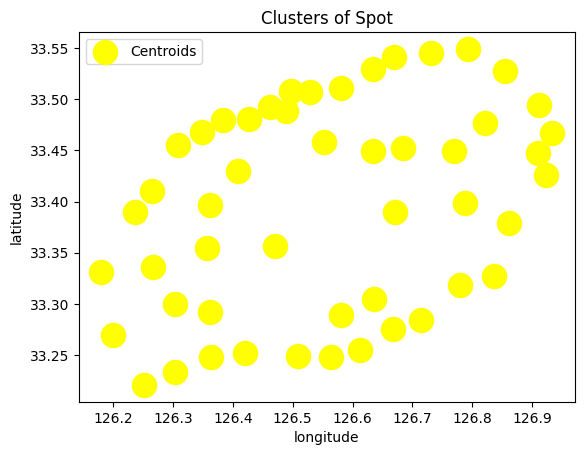

In [6]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Spot')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.show()

## 계절별 POI 생성

In [9]:
for season in SEASONS:
    months = season_match(season)
    
    df_list = []
    for month in months:
        df_list.append(pd.read_csv(ABSOLUTE_PATH + f"stay_point\\stay_point_{month}.csv"))
    season_df = pd.concat(df_list)
    
    for k in KS:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42).fit(season_df[['longitude','latitude']])
        
        centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['longitude', 'latitude'])
        centroids.to_csv(ABSOLUTE_PATH + f"stay_point\\cluster_data\\{season}\\{season}_cluster_{k}.csv", index=False)
    

## 전체 POI 생성

In [6]:
import pandas as pd

df_list = []
for month in MONTHS:
    df_list.append(pd.read_csv(ABSOLUTE_PATH + f"stay_point\\stay_point_{month}.csv"))
total_df = pd.concat(df_list)


for k in KS:
    print(k)
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42).fit(total_df[['longitude','latitude']])
    
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['longitude', 'latitude'])
    centroids.to_csv(ABSOLUTE_PATH + f"stay_point\\cluster_data\\total\\total_cluster_{k}.csv", index=False)

25


c:\Users\rudnf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


50


c:\Users\rudnf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


75


c:\Users\rudnf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


100


c:\Users\rudnf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
